In [134]:
from QS_Modules import env, fb_login
from QS_Modules.models import Query, Track, Monitor, Topic
import matplotlib.pyplot as plt
import pymysql
import pymysql.cursors

DRIVER_PATH = env.DRIVER_PATH
MYSQL_PWD = env.MYSQL_PWD
MYSQL_ACCOUNT = env.MYSQL_ACCOUNT
MYSQL_ROUTE = env.MYSQL_ROUTE
MYSQL_PORT = env.MYSQL_PORT
MYSQL_DB = env.MYSQL_DB

QUERY = Query(
    host=MYSQL_ROUTE,
    user=MYSQL_ACCOUNT,
    pwd=MYSQL_PWD,
    port=MYSQL_PORT,
    db_name=MYSQL_DB
)

CONNECTION = pymysql.connect(host=MYSQL_ROUTE,
                             user=MYSQL_ACCOUNT,
                             password=MYSQL_PWD,
                             database=MYSQL_DB,
                             cursorclass=pymysql.cursors.DictCursor)

In [129]:
class Plot():
    def __init__(self, QUERY, CONNECTION):
        self.QUERY = QUERY
        self.CONNECTION = CONNECTION

    def plot_view_count_plt(self, url):
        session = self.QUERY.session
        raw = session.query(Track).filter(Track.url == url)
        topic_id = url.split('&t=')[-1]
        results = [QUERY.to_dict(i) for i in raw.all()]
        x = [i['triggered_at'] for i in results]
        y = [i['view_count'] for i in results]
        xtick_lables = [i.strftime('%m-%d %H:%M') for i in x]
        plt.rcParams["figure.figsize"] = (24, 6)
        fig = plt.figure()
        ax = plt.gca()
        ax.plot(x, y, linestyle='--', marker='o')
        plt.xticks(x, xtick_lables, rotation=0)
        plt.title(f'View count of: {topic_id}')
        plt.xlabel('triggered_at')
        plt.ylabel('view_count')
        plt.show()
        
    def plot_monitor_plt(self):
        session = self.QUERY.session
        raw = session.query(Monitor)
        results = [QUERY.to_dict(i) for i in raw.all()]
        new_topics_count = [i['new_topics_count'] for i in results]
        target_topics_count = [i['target_topics_count'] for i in results]
        execution_count = [i['execution_count'] for i in results]
        triggered_at = [i['triggered_at'] for i in results]
        plt.rcParams["figure.figsize"] = (24, 6)
        fig = plt.figure()
        ax = plt.gca()
        ax.plot(triggered_at, new_topics_count, label='New Topics')
        ax.plot(triggered_at, target_topics_count, label='Target Topics')
        ax.plot(triggered_at, execution_count, label='Tracked Topics')
        plt.title('Monitor')
        plt.xlabel('triggered_at')
        plt.ylabel('topic_count')
        plt.legend()
        plt.show()
    
    def plot_first_show(self, start_date_str='2021-07-16'):
        connection = self.CONNECTION
        with connection.cursor() as cursor:
            sql = """
                    select count(topic.topic_id), track.view_count
                    from topic
                    join track on topic.url = track.url
                    where topic.triggered_at = track.triggered_at
                    and topic.triggered_at <= %s
                    and topic.post_time >= '2021-07-15 13:00:25'
                    group by track.view_count
                    order by track.view_count;
                """
            cursor.execute(sql, (start_date_str))
            results = cursor.fetchall()
        topic_count = [i['count(topic.topic_id)'] for i in results]
        view_counts = [i['view_count'] for i in results]
        plt.rcParams["figure.figsize"] = (24, 6)
        fig = plt.figure()
        ax = plt.gca()
        ax.bar(range(len(view_counts)), topic_count, width=0.8)
        plt.xticks(range(len(view_counts)), view_counts)
        plt.title(f'Topic Count with Different view_count: from 2021-07-15 to {start_date_str}')
        plt.xlabel('view_count')
        plt.ylabel('topic_count')
        plt.show()


plot = Plot(QUERY, CONNECTION)

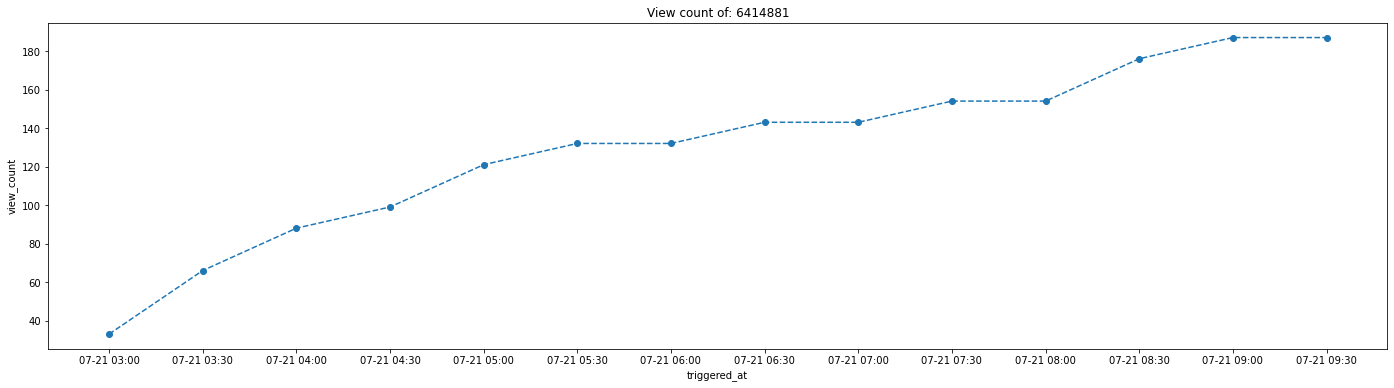

In [130]:
url = 'https://www.mobile01.com/topicdetail.php?f=811&t=6414881'
plot.plot_view_count_plt(url)

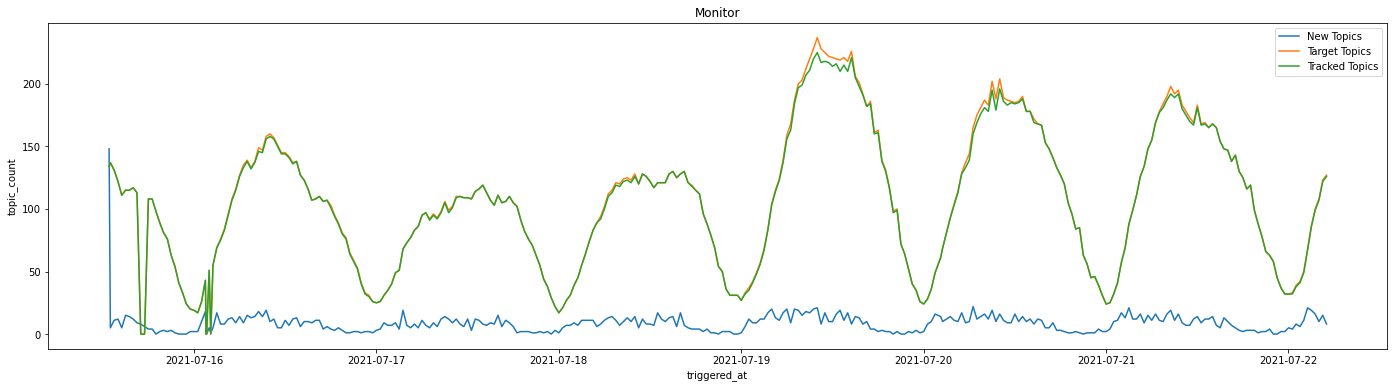

In [131]:
plot.plot_monitor_plt()

[0, 11, 22, 33, 44, 45, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 253, 264, 297, 319, 374, 418, 429, 572, 737, 1617]
[975, 350, 388, 310, 150, 1, 112, 68, 41, 33, 29, 18, 10, 6, 10, 5, 3, 5, 2, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


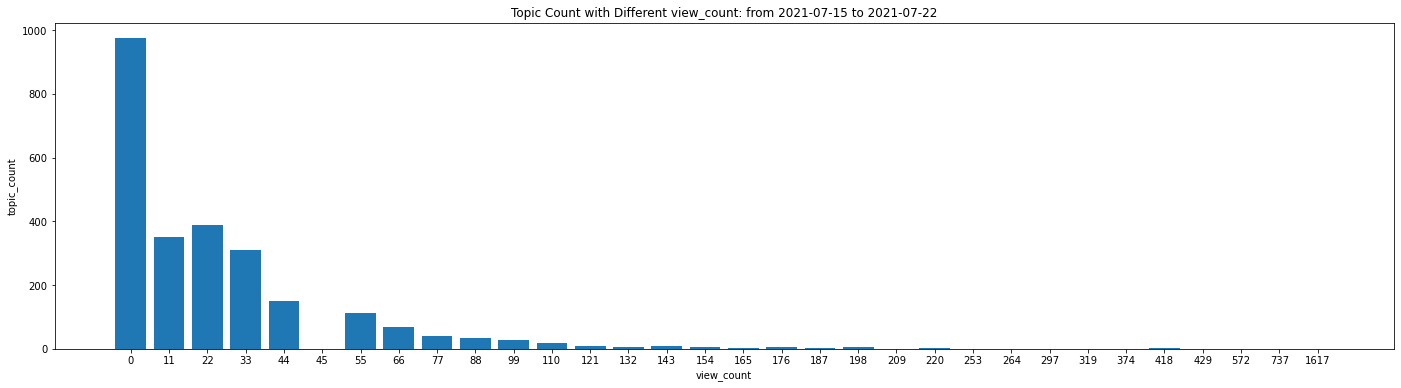

In [132]:
plot.plot_first_show(start_date_str='2021-07-22')

In [135]:
# FB_TEST_EMAIL = env.FB_TEST_EMAIL
# FB_TEST_PWD = env.FB_TEST_PWD
# thread_id = 100070719168616
# msg = '測試0722'
# headers = {
#     "Content-Length": "467",
#     "User-Agent":
#     "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36",
#     "Content-Type": "application/x-www-form-urlencoded",
#     "Accept": "*/*",
#     "Origin": "https://www.messenger.com",
#     "Referer": "https://www.messenger.com/",
# }

# http_fb = fb_login.HTTPFB(headers, FB_TEST_EMAIL, FB_TEST_PWD, msg, thread_id)
# http_fb.main()

<Response [200]>


In [136]:
# FB_REAL_EMAIL = env.FB_REAL_EMAIL
# FB_REAL_PWD = env.FB_REAL_PWD
# QSEARCH_THREAD = 430401096982804
# thread_id = QSEARCH_THREAD
# msg = '測試0722'

# http_fb = fb_login.HTTPFB(headers, FB_REAL_EMAIL, FB_REAL_PWD, msg, thread_id)
# http_fb.main()

<Response [200]>
